In [1]:
include("grape.jl")
using Ipopt
using PyPlot

In [2]:
function gen_test_op(v)
    op = SA[cos(v) - 0.2im 0.1
            -sin(v) * 0.2im cos(v) / 2im - 0.1]
    grad = SA[-sin(v) 0
              -cos(v) * 0.2im -sin(v) / 2im]
    return op, grad
end
function f_test1(v)
    return _op_norm(gen_test_op(v)[1])
end
function g_test1(v)
    return _op_grad(gen_test_op(v)...)
end

g_test1 (generic function with 1 method)

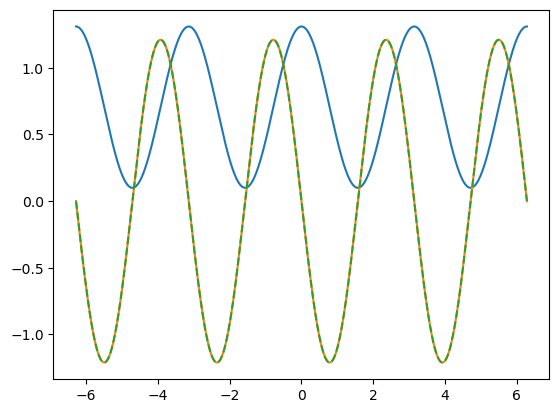

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffdffda59a0>

In [3]:
plot_vs = range(-2π, 2π, 10001)
plot(plot_vs, f_test1.(plot_vs))
plot(plot_vs, g_test1.(plot_vs))
plot(plot_vs[2:end], (f_test1.(plot_vs[2:end]) .- f_test1.(plot_vs[1:end - 1])) ./ step(plot_vs), "--")

In [4]:
function gen_test_op2(op, tgt, param::NTuple{N}, var_idx) where N
    function tester(v)
        _param = ntuple(i->(i == var_idx ? v : param[i]), N)
        _op, grads... = get_op_grads(op, _param)
        return _op .- tgt, grads[var_idx]
    end
    function f(v)
        return _op_norm(tester(v)[1])
    end
    function g(v)
        return _op_grad(tester(v)...)
    end
    return f, g
end

gen_test_op2 (generic function with 1 method)

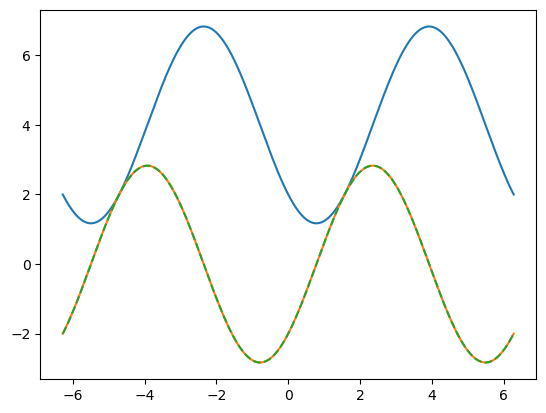

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffdfac3ec60>

In [5]:
f_test2, g_test2 = gen_test_op2(XYRotation(), SA[0 1.0; 1.0im 0], (0.0, 1π), 1)
plot_vs = range(-2π, 2π, 10001)
plot(plot_vs, f_test2.(plot_vs))
plot(plot_vs, g_test2.(plot_vs))
plot(plot_vs[2:end], (f_test2.(plot_vs[2:end]) .- f_test2.(plot_vs[1:end - 1])) ./ step(plot_vs), "--")

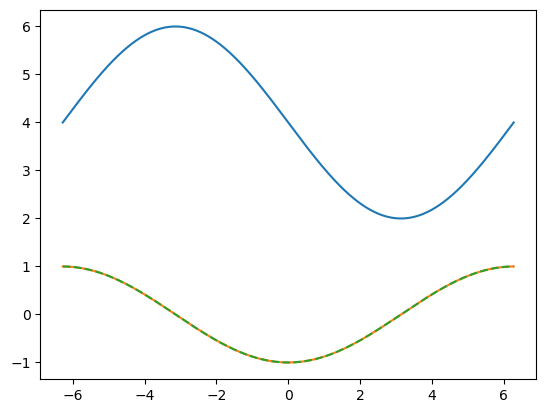

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffdf1a5c1a0>

In [6]:
f_test2, g_test2 = gen_test_op2(XYRotation(), SA[0 1.0; 1.0im 0], (0.0, 1π), 2)
plot_vs = range(-2π, 2π, 10001)
plot(plot_vs, f_test2.(plot_vs))
plot(plot_vs, g_test2.(plot_vs))
plot(plot_vs[2:end], (f_test2.(plot_vs[2:end]) .- f_test2.(plot_vs[1:end - 1])) ./ step(plot_vs), "--")

In [7]:
const target_pi = SA[0im 1.0; 1.0 0im]
const scales_1 = ((1.0, 1.0),)

((1.0, 1.0),)

In [8]:
const opt_pi1_1 = SingleBitOptimizer(target_pi, scales_1, 1)
model_pi1_1 = Model(Ipopt.Optimizer)
params_pi1_1 = prep_model(opt_pi1_1, model_pi1_1)

4-element Vector{VariableRef}:
 params[1]
 params[2]
 params[3]
 params[4]

In [9]:
optimize!(opt_pi1_1, model_pi1_1, params_pi1_1, (0.2, 0.2, 0.2, 0.2))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

([0.11897703384623441, 3.1415926536457457, 0.2379540678878605, -1.5707963262774651], 5.561249931373733e-19)

In [10]:
function f_test3(v)
    update_params!(opt_pi1_1, (0.0, 1π, 0.0, v))
    return opt_pi1_1.diff
end
function g_test3(v)
    update_params!(opt_pi1_1, (0.0, 1π, 0.0, v))
    return opt_pi1_1.diff_grad[4]
end

g_test3 (generic function with 1 method)

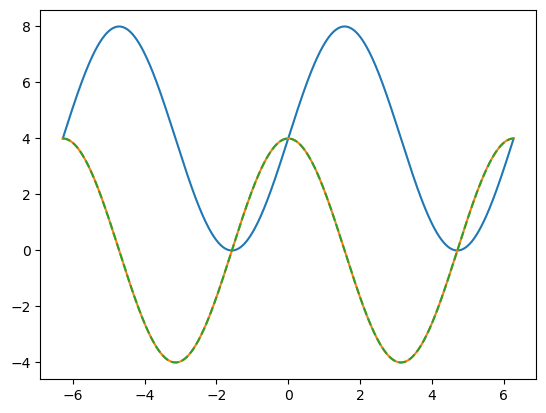

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffdf1aaa2d0>

In [11]:
plot_vs = range(-2π, 2π, 10001)
plot(plot_vs, f_test3.(plot_vs))
plot(plot_vs, g_test3.(plot_vs))
plot(plot_vs[2:end], (f_test3.(plot_vs[2:end]) .- f_test3.(plot_vs[1:end - 1])) ./ step(plot_vs), "--")

In [12]:
const scales_2 = ((1.0, 1.0), (0.8, 0.9), (0.6, 0.8), (0.4, 0.7))
const opt_pi1_2 = SingleBitOptimizer(target_pi, scales_2, 1)
model_pi1_2 = Model(Ipopt.Optimizer)
params_pi1_2 = prep_model(opt_pi1_2, model_pi1_2)

4-element Vector{VariableRef}:
 params[1]
 params[2]
 params[3]
 params[4]

In [13]:
optimize!(opt_pi1_2, model_pi1_2, params_pi1_2, (0.2, 0.2, 0.2, 0.2))

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.3795874e+01 0.00e+00 1.34e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

([0.11525720125059113, 4.282894707599364, 0.23085865283987736, -1.5666985145259513], 1.484544453475805)